In [166]:
# ML ROUND TWO
# This is essentially a scratch pad; will clean things up at the end and add descriptions/whatnot

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [168]:
#sl = School Level
sl_2022 = pd.read_csv("misconduct_report_police_and_expulsion_thru_eoy_2022_school_level.csv")

#dl = District Level
dl_2022 = pd.read_csv("misconduct_report_police_and_expulsion_thru_eoy_2022_district_level.csv")

In [169]:
dl_2022.head()

,Category,School Year,Time Period1,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Suspensions6,% of Misconducts Resulting in a Suspension,# of ISS,...,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,# of Students Expelled.1,Expulsions per 100 Students.1,# of Students Expelled.2,Expulsions per 100 Students.2,Unnamed: 32
0,District Wide,2013-2014,S1,61661.00,31505.00,26153.00,4003.00,45455.00,73.70,20226.00,...,0.68,1864.00,0.60,205.00,0.06,70.00,0.02,135.00,0.28,NaN
1,District Wide,2013-2014,EOY,120543.00,58906.00,53311.00,8326.00,87763.00,72.80,38055.00,...,1.46,3543.00,1.20,495.00,0.17,184.00,0.06,311.00,0.79,NaN
2,District Wide,2014-2015,S1,60026.00,35577.00,20971.00,3478.00,27601.00,46.00,17675.00,...,0.61,1671.00,0.50,138.00,0.04,20.00,0.01,118.00,0.23,NaN
3,District Wide,2014-2015,EOY,132529.00,74771.00,49841.00,7917.00,63031.00,47.60,38668.00,...,1.42,3347.00,1.10,430.00,0.15,111.00,0.04,319.00,0.78,NaN
4,District Wide,2015-2016,S1,60093.00,34187.00,22244.00,3662.00,26924.00,44.80,16747.00,...,0.48,1340.00,0.40,138.00,0.04,34.00,0.01,104.00,0.20,NaN


In [170]:
dl_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 33 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Category                                            653 non-null    object 
 1   School Year                                         653 non-null    object 
 2   Time Period1                                        653 non-null    object 
 3   # of Misconducts2                                   653 non-null    float64
 4   # of Group 1-2 (minor) Misconducts3                 641 non-null    float64
 5   # of Group 3-4 (moderate) Misconducts4              637 non-null    float64
 6   # of Group 5-6 (major) Misconducts5                 574 non-null    float64
 7   # of Suspensions6                                   602 non-null    float64
 8   % of Misconducts Resulting in a Suspension          602 non-null    float64
 9  

In [171]:
DLML1322 = dl_2022.loc[(dl_2022['Time Period1'] == 'EOY')]

In [172]:
DLML1322.head()

,Category,School Year,Time Period1,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Suspensions6,% of Misconducts Resulting in a Suspension,# of ISS,...,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,# of Students Expelled.1,Expulsions per 100 Students.1,# of Students Expelled.2,Expulsions per 100 Students.2,Unnamed: 32
1,District Wide,2013-2014,EOY,120543.00,58906.00,53311.00,8326.00,87763.00,72.80,38055.00,...,1.46,3543.00,1.20,495.00,0.17,184.00,0.06,311.00,0.79,NaN
3,District Wide,2014-2015,EOY,132529.00,74771.00,49841.00,7917.00,63031.00,47.60,38668.00,...,1.42,3347.00,1.10,430.00,0.15,111.00,0.04,319.00,0.78,NaN
5,District Wide,2015-2016,EOY,122104.00,68376.00,46004.00,7724.00,57321.00,46.90,34174.00,...,1.16,2637.00,0.90,358.00,0.13,75.00,0.03,283.00,0.65,NaN
7,District Wide,2016-2017,EOY,100489.00,62078.00,32379.00,6032.00,38199.00,38.00,21574.00,...,0.97,2215.00,0.80,258.00,0.09,103.00,0.04,155.00,0.37,NaN
9,District Wide,2017-2018,EOY,97727.00,63453.00,28190.00,6084.00,34168.00,35.00,20605.00,...,1.02,1995.00,0.90,198.00,0.08,52.00,0.02,146.00,0.37,NaN


In [173]:
print(DLML1322.apply(lambda col: col.unique()))

Category                                              [District Wide, Male, Female, Non-Binary Gende...
School Year                                           [2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...
Time Period1                                                                                      [EOY]
# of Misconducts2                                     [120543.0, 132529.0, 122104.0, 100489.0, 97727...
# of Group 1-2 (minor) Misconducts3                   [58906.0, 74771.0, 68376.0, 62078.0, 63453.0, ...
# of Group 3-4 (moderate) Misconducts4                [53311.0, 49841.0, 46004.0, 32379.0, 28190.0, ...
# of Group 5-6 (major) Misconducts5                   [8326.0, 7917.0, 7724.0, 6032.0, 6084.0, 7824....
# of Suspensions6                                     [87763.0, 63031.0, 57321.0, 38199.0, 34168.0, ...
% of Misconducts Resulting in a Suspension            [72.8, 47.6, 46.9, 38.0, 35.0, 42.5, 31.1, 1.1...
# of ISS                                              [38055.0, 

In [174]:
DLMLF1322 = DLML1322[['Category','School Year','# of Misconducts2','# of Group 1-2 (minor) Misconducts3','# of Group 3-4 (moderate) Misconducts4','# of Group 5-6 (major) Misconducts5',
    '# of Police Notifications', '% of Misconducts Resulting in Police Notification']]
DLMLF1322 = DLMLF1322.loc[((DLMLF1322['Category'] == 'Grade PK-2') | (DLMLF1322['Category'] == 'Grade 3-5') | (DLMLF1322['Category'] == 'Grade 6-8') | (DLMLF1322['Category'] == 'Grade 9-12'))]

In [175]:
DLMLF1322.head()

,Category,School Year,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Police Notifications,% of Misconducts Resulting in Police Notification
582,Grade PK-2,2013-2014,5014.00,2353.00,2413.00,248.00,33.00,0.70
584,Grade PK-2,2014-2015,6012.00,3731.00,2140.00,141.00,48.00,0.80
586,Grade PK-2,2015-2016,5450.00,3481.00,1819.00,150.00,43.00,0.80
588,Grade PK-2,2016-2017,4655.00,2887.00,1637.00,131.00,46.00,1.00
590,Grade PK-2,2017-2018,4703.00,3135.00,1470.00,98.00,47.00,1.00


In [176]:
print(DLMLF1322.apply(lambda col: col.unique()))

Category                                                [Grade PK-2, Grade 3-5, Grade 6-8, Grade 9-12]
School Year                                          [2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...
# of Misconducts2                                    [5014.0, 6012.0, 5450.0, 4655.0, 4703.0, 4648....
# of Group 1-2 (minor) Misconducts3                  [2353.0, 3731.0, 3481.0, 2887.0, 3135.0, 3186....
# of Group 3-4 (moderate) Misconducts4               [2413.0, 2140.0, 1819.0, 1637.0, 1470.0, 1264....
# of Group 5-6 (major) Misconducts5                  [248.0, 141.0, 150.0, 131.0, 98.0, 198.0, 45.0...
# of Police Notifications                            [33.0, 48.0, 43.0, 46.0, 47.0, 26.0, 17.0, 1.0...
% of Misconducts Resulting in Police Notification    [0.7, 0.8, 1.0, 0.6, 0.3, 1.1, 0.9, 1.3, 1.2, ...
dtype: object


In [177]:
dt = ['Category','School Year','# of Misconducts2','# of Group 1-2 (minor) Misconducts3','# of Group 3-4 (moderate) Misconducts4','# of Group 5-6 (major) Misconducts5',
    '# of Police Notifications', '% of Misconducts Resulting in Police Notification']

for i in dt:
    print(np.dtype(DLMLF1322[i]))

object
object
float64
float64
float64
float64
float64
float64


In [178]:
DLMLF1322['Category'] = DLMLF1322['Category'].astype('category').cat.codes
DLMLF1322['School Year'] = DLMLF1322['School Year'].astype('category').cat.codes

In [179]:
print(np.dtype(DLMLF1322['Category']))
print(np.dtype(DLMLF1322['School Year']))

int8
int8


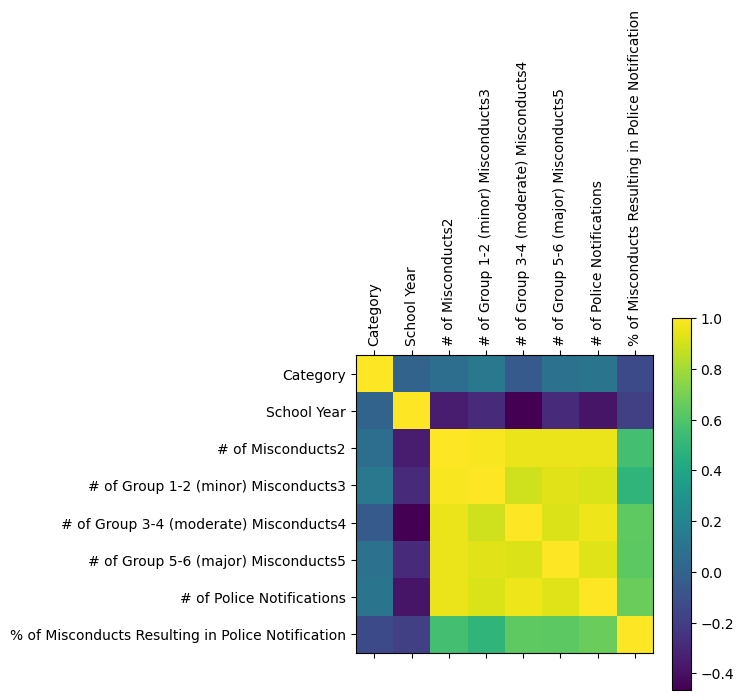

In [180]:
plt.matshow(DLMLF1322.corr())
plt.xticks(np.arange(8), DLMLF1322.columns, rotation=90)
plt.yticks(np.arange(8), DLMLF1322.columns, rotation=0)
plt.colorbar()
plt.show()

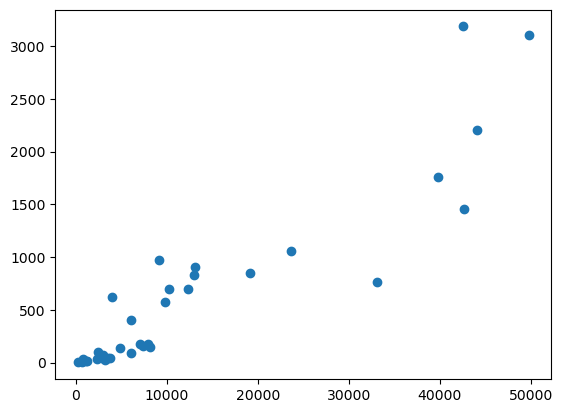

In [181]:
plt.scatter(DLMLF1322['# of Group 1-2 (minor) Misconducts3'], DLMLF1322['# of Police Notifications'])

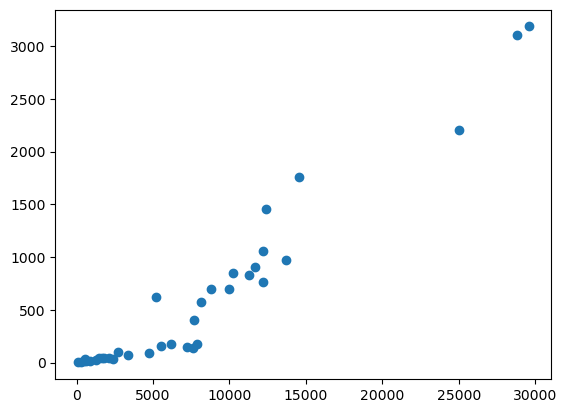

In [182]:
plt.scatter(DLMLF1322['# of Group 3-4 (moderate) Misconducts4'], DLMLF1322['# of Police Notifications'])

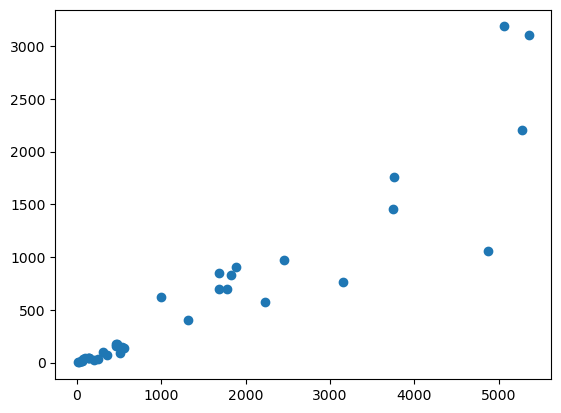

In [183]:
plt.scatter(DLMLF1322['# of Group 5-6 (major) Misconducts5'], DLMLF1322['# of Police Notifications'])

In [184]:
X = np.asarray(DLMLF1322[['# of Group 1-2 (minor) Misconducts3', '# of Group 3-4 (moderate) Misconducts4', '# of Group 5-6 (major) Misconducts5']])
Y = np.asarray(DLMLF1322[['# of Police Notifications']])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=123)

Score:  0.8540982793371228
Weights:  [[0.00872676 0.07219758 0.09436444]]


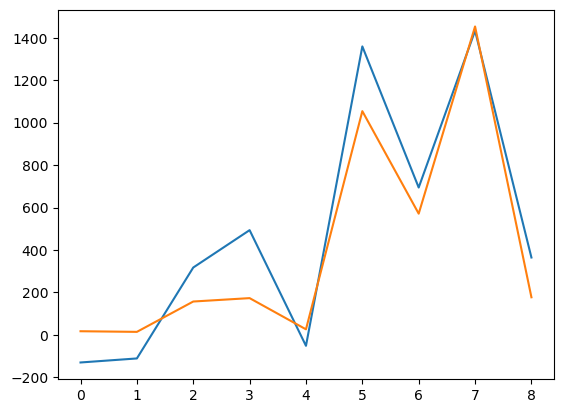

In [185]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.8540982896253351
Weights:  [[0.00872676 0.07219758 0.09436442]]


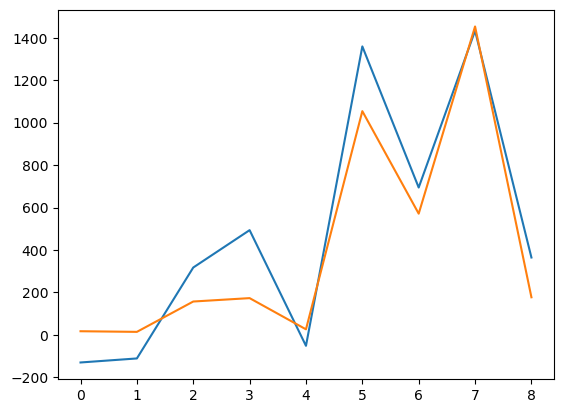

In [186]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [220]:
# weird .. wait, it suddenly started working?!

X = np.asarray(DLMLF1322[['# of Group 1-2 (minor) Misconducts3', '# of Group 3-4 (moderate) Misconducts4', '# of Group 5-6 (major) Misconducts5']])
Y = np.asarray(DLMLF1322[['# of Police Notifications']])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=125)

#clf = LazyClassifier(verbose=0, ignore_warnings=False)
clf = LazyRegressor(verbose=0,ignore_warnings=False)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:00<00:00, 56.56it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GammaRegressor,0.95,0.97,169.73,0.01
ExtraTreeRegressor,0.95,0.97,177.85,0.01
PoissonRegressor,0.95,0.97,180.89,0.01
OrthogonalMatchingPursuit,0.91,0.94,236.34,0.00
RANSACRegressor,0.90,0.94,249.04,0.01
OrthogonalMatchingPursuitCV,0.88,0.93,266.14,0.01
LassoLarsIC,0.88,0.93,267.05,0.00
LarsCV,0.88,0.93,267.05,0.01
Lars,0.88,0.93,267.05,0.01


In [188]:
model_dictionary

{'AdaBoostClassifier': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('numeric',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Int64Index([0, 1, 2], dtype='int64')),
                                                  ('categorical_low',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(fill_value='missing',
                                                                                  strategy='constant')),
                                                                   ('encoding',
                      

In [189]:
sl_2022.head()

,School ID,School Name,School Network,School Year,Time Period,# of Misconducts,# of Group 1-2 Misconducts,# of Group 3-4 Misconducts,# of Group 5-6 Misconducts,# of Suspensions (includes ISS and OSS),...,# of Unique Students Receiving OSS,% of Unique Students Receiving OSS,Average Length of OSS,# of Police Notifications,% of Misconducts Resulting in a Police Notification,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students
0,400121,ACERO - DE LA CRUZ,Charter,2017-2018,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.15
1,400081,ACERO - DE LAS CASAS,Charter,2018-2019,S1,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.38
2,400081,ACERO - DE LAS CASAS,Charter,2018-2019,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.38
3,400085,ACERO - GARCIA HS,Charter,2017-2018,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,2,0.33
4,400089,ACERO - MARQUEZ,Charter,2017-2018,S1,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.18


In [190]:
sl_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9220 entries, 0 to 9219
Data columns (total 30 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   School ID                                                          9220 non-null   int64  
 1   School Name                                                        9220 non-null   object 
 2   School Network                                                     9220 non-null   object 
 3   School Year                                                        9220 non-null   object 
 4   Time Period                                                        9220 non-null   object 
 5   # of Misconducts                                                   9220 non-null   object 
 6   # of Group 1-2 Misconducts                                         9220 non-null   object 
 7   # of Group 3-4 Misconduc

In [191]:
SLML1322 = sl_2022.loc[(sl_2022['Time Period'] == 'EOY')]

In [192]:
print(SLML1322.apply(lambda col: col.unique()))

School ID                                                             [400121, 400081, 400085, 400089, 400149, 60977...
School Name                                                           [ACERO - DE LA CRUZ, ACERO - DE LAS CASAS, ACE...
School Network                                                        [Charter, Network 13, ISP, Network 4, Military...
School Year                                                           [2017-2018, 2018-2019, 2019-2020, 2013-2014, 2...
Time Period                                                                                                       [EOY]
# of Misconducts                                                      [--, 12, 24, 19, 3, 16, 39, 25, 40, 63, 54, 66...
# of Group 1-2 Misconducts                                            [--, 1, 4, 2, 3, 8, 14, 16, 19, 23, 9, 38, 11,...
# of Group 3-4 Misconducts                                            [--, 9, 17, 12, 0, 27, 11, 18, 43, 35, 42, 37,...
# of Group 5-6 Misconducts              

In [193]:
SLMLF1322 = SLML1322[['School Name','School Network','School Year','# of Misconducts','# of Group 1-2 Misconducts','# of Group 3-4 Misconducts',
    '# of Group 5-6 Misconducts', '# of Suspensions (includes ISS and OSS)','# of Police Notifications', '% of Misconducts Resulting in a Police Notification']]

In [194]:
print(SLMLF1322.apply(lambda col: col.unique()))

School Name                                            [ACERO - DE LA CRUZ, ACERO - DE LAS CASAS, ACE...
School Network                                         [Charter, Network 13, ISP, Network 4, Military...
School Year                                            [2017-2018, 2018-2019, 2019-2020, 2013-2014, 2...
# of Misconducts                                       [--, 12, 24, 19, 3, 16, 39, 25, 40, 63, 54, 66...
# of Group 1-2 Misconducts                             [--, 1, 4, 2, 3, 8, 14, 16, 19, 23, 9, 38, 11,...
# of Group 3-4 Misconducts                             [--, 9, 17, 12, 0, 27, 11, 18, 43, 35, 42, 37,...
# of Group 5-6 Misconducts                             [--, 2, 3, 1, 4, 0, 6, 5, 27, 21, 22, 25, 15, ...
# of Suspensions (includes ISS and OSS)                [--, 10, 8, 15, 2, 22, 6, 16, 42, 24, 49, 53, ...
# of Police Notifications                              [--, 0, 2, 3, 1, 6, 5, 9, 15, 23, 4, 19, 8, 7,...
% of Misconducts Resulting in a Police Notification    

In [195]:
dt = ['School Name','School Network','School Year','# of Misconducts','# of Group 1-2 Misconducts','# of Group 3-4 Misconducts',
    '# of Group 5-6 Misconducts', '# of Suspensions (includes ISS and OSS)','# of Police Notifications', '% of Misconducts Resulting in a Police Notification']

for i in dt:
    print(np.dtype(SLMLF1322[i]))

object
object
object
object
object
object
object
object
object
object


In [196]:
SLMLF1322 = SLMLF1322[SLMLF1322['School Name'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['School Network'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['School Year'] != '--']

SLMLF1322 = SLMLF1322[SLMLF1322['# of Misconducts'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['# of Group 1-2 Misconducts'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['# of Group 3-4 Misconducts'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['# of Group 5-6 Misconducts'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['# of Suspensions (includes ISS and OSS)'] != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['# of Police Notifications'].astype('int64') != '--']
SLMLF1322 = SLMLF1322[SLMLF1322['% of Misconducts Resulting in a Police Notification'] != '--']

In [209]:
SLMLF1322['School Name'] = SLMLF1322['School Name'].astype('category').cat.codes
SLMLF1322['School Network'] = SLMLF1322['School Network'].astype('category').cat.codes
SLMLF1322['School Year'] = SLMLF1322['School Year'].astype('category').cat.codes

SLMLF1322['# of Misconducts'] = SLMLF1322['# of Misconducts'].astype('int64')
SLMLF1322['# of Group 1-2 Misconducts'] = SLMLF1322['# of Group 1-2 Misconducts'].astype('int64')
SLMLF1322['# of Group 3-4 Misconducts'] = SLMLF1322['# of Group 3-4 Misconducts'].astype('int64')
SLMLF1322['# of Group 5-6 Misconducts'] = SLMLF1322['# of Group 5-6 Misconducts'].astype('int64')
SLMLF1322['# of Suspensions (includes ISS and OSS)'] = SLMLF1322['# of Suspensions (includes ISS and OSS)'].astype('int64')
SLMLF1322['# of Police Notifications'] = SLMLF1322['# of Police Notifications'].astype('int64')
SLMLF1322['% of Misconducts Resulting in a Police Notification'] = SLMLF1322['% of Misconducts Resulting in a Police Notification'].astype('float')

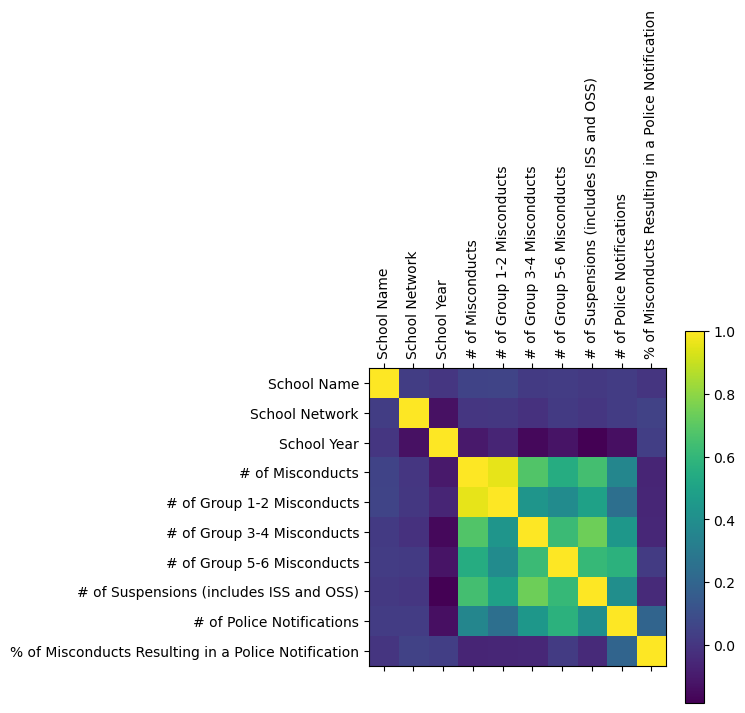

In [210]:
plt.matshow(SLMLF1322.corr())
plt.xticks(np.arange(10), SLMLF1322.columns, rotation=90)
plt.yticks(np.arange(10), SLMLF1322.columns, rotation=0)
plt.colorbar()
plt.show()

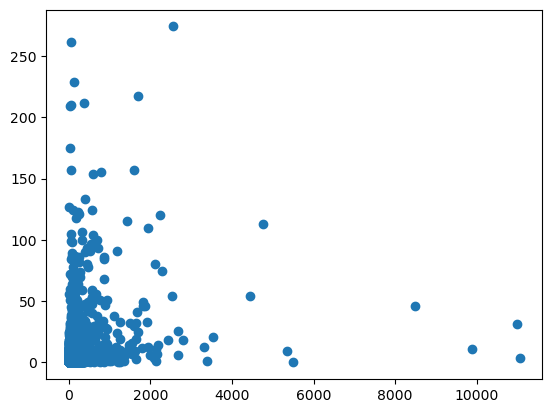

In [199]:
plt.scatter(SLMLF1322['# of Group 1-2 Misconducts'], SLMLF1322['# of Police Notifications'])

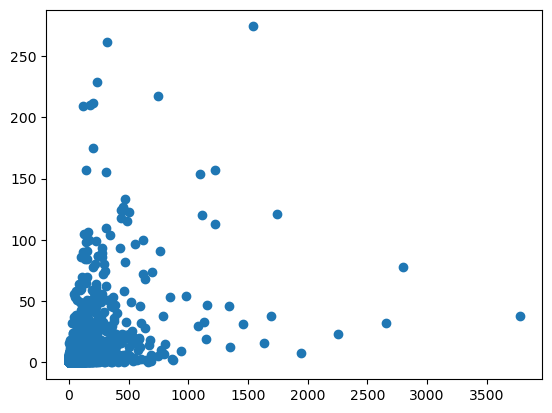

In [200]:
plt.scatter(SLMLF1322['# of Group 3-4 Misconducts'], SLMLF1322['# of Police Notifications'])

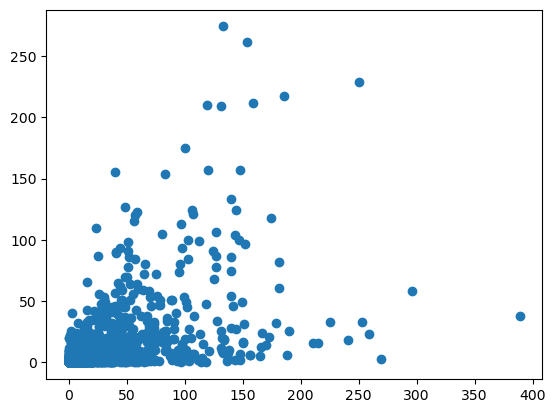

In [201]:
plt.scatter(SLMLF1322['# of Group 5-6 Misconducts'], SLMLF1322['# of Police Notifications'])

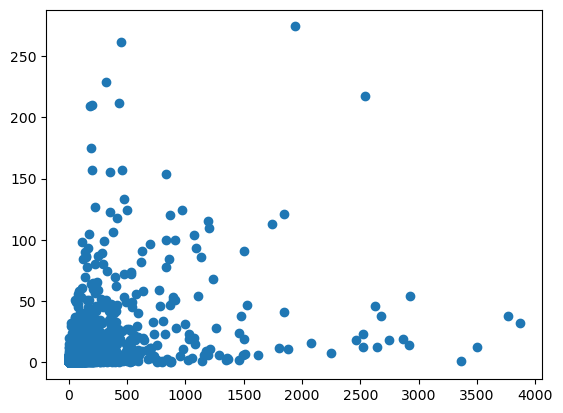

In [202]:
plt.scatter(SLMLF1322['# of Suspensions (includes ISS and OSS)'], SLMLF1322['# of Police Notifications'])

In [211]:
X = np.asarray(SLMLF1322[['# of Group 1-2 Misconducts', '# of Group 3-4 Misconducts', '# of Group 5-6 Misconducts']])
Y = np.asarray(SLMLF1322[['# of Police Notifications']])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=123)

Score:  0.18690970933686302
Weights:  [[-0.00102305  0.01396318  0.34477901]]


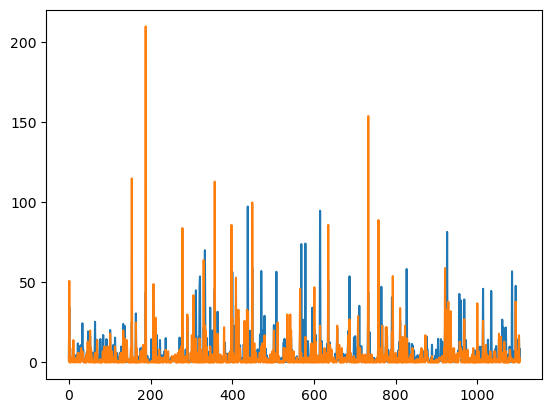

In [212]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.18690981781881066
Weights:  [[-0.00102305  0.01396319  0.34477888]]


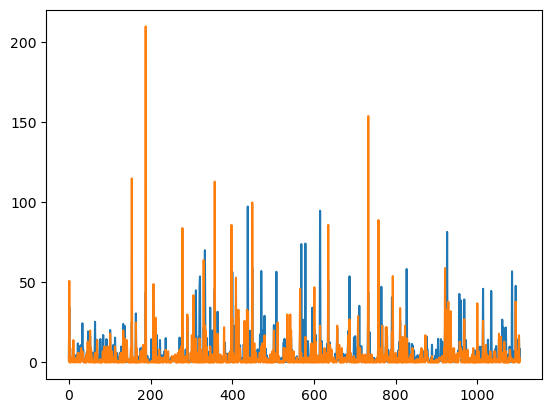

In [213]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(p=1, n_neighbors=5) # Manhatten
knn1.fit(X_train, y_train)
print(knn1.score(X_train, y_train))
print(knn1.score(X_test, y_test))

0.5058859040144884
0.3601809954751131


In [219]:
# weird
X = np.asarray(SLMLF1322[['# of Group 1-2 Misconducts', '# of Group 3-4 Misconducts', '# of Group 5-6 Misconducts']])
Y = np.asarray(SLMLF1322[['# of Police Notifications']])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=123)

#clf2 = LazyClassifier(verbose=0,ignore_warnings=False)
clf2 = LazyRegressor(verbose=0,ignore_warnings=False)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train, X_test, y_train, y_test)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  7%|▋         | 2/29 [00:00<00:09,  2.94it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:20<02:35,  6.21s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for CategoricalNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:21<00:40,  2.04s/it]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:21<00:22,  1.33s/it]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:22<00:20,  1.28s/it]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:27<00:23,  1.69s/it]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')


 66%|██████▌   | 19/29 [00:29<00:09,  1.05it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')


 69%|██████▉   | 20/29 [00:29<00:07,  1.24it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
QuadraticDiscriminantAnalysis model failed to execute
y has only 1 sample in class 37, covariance is ill defined.


 76%|███████▌  | 22/29 [00:30<00:04,  1.51it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:30<00:01,  2.37it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:31<00:01,  1.72it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98], got [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  45  46  47  48  49  51  52  53  54  56  57
  58  59  60  61  62  64  65  66  68  70  72  74  75  78  80  82  84  87
  90  91  93  97  98  99 100 104 105 106 110 118 120 121 123 124 127 133
 155 157 175 209 212 217 229 261 274]


100%|██████████| 29/29 [00:33<00:00,  1.16s/it]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.31,0.06,None,0.30,0.02
PassiveAggressiveClassifier,0.40,0.05,None,0.27,0.11
LinearDiscriminantAnalysis,0.40,0.04,None,0.24,0.02
SVC,0.40,0.04,None,0.25,1.39
RandomForestClassifier,0.33,0.03,None,0.29,0.73
DecisionTreeClassifier,0.30,0.03,None,0.29,0.02
RidgeClassifier,0.40,0.03,None,0.24,0.02
RidgeClassifierCV,0.40,0.03,None,0.24,0.04
ExtraTreesClassifier,0.33,0.03,None,0.29,0.83


In [208]:
model_dictionary

{'AdaBoostClassifier': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('numeric',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Int64Index([0, 1, 2], dtype='int64')),
                                                  ('categorical_low',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(fill_value='missing',
                                                                                  strategy='constant')),
                                                                   ('encoding',
                      

In [230]:
# weird
X = np.asarray(DLMLF1322[['# of Group 1-2 (minor) Misconducts3', '# of Group 3-4 (moderate) Misconducts4', '# of Group 5-6 (major) Misconducts5']])
Y = np.asarray(DLMLF1322[['# of Police Notifications']])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=125)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [240]:
etr = ExtraTreesRegressor()

etr.fit(X_train, y_train)

score = etr.score(X_test, y_test)
print('Score: ', score)

Score:  0.9147966620678104


In [241]:
cv_scores = cross_val_score(etr, X_train, y_train, cv=10)
print('Mean cross-val score: %.2f' % cv_scores.mean())

Mean cross-val score: 0.67


In [242]:
y_pred = etr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE: %.2f' % mse) # lol
print('RMSE: %.2f' % mse**(0.5))

MSE: 81947.60
RMSE: 286.26


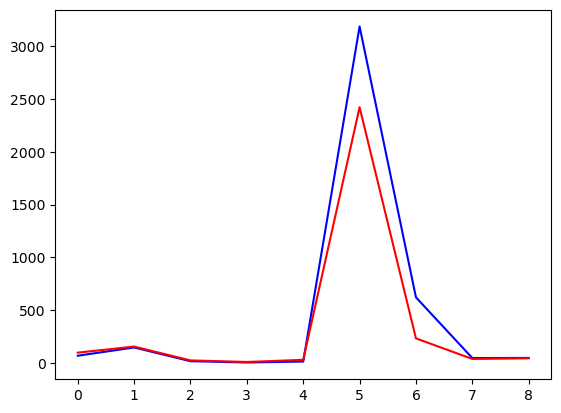

In [243]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, color='blue', label='original')
plt.plot(x_ax, y_pred, color='red', label='predicted')
plt.show()

In [ ]:
# Welp, this def needs work